<a href="https://colab.research.google.com/github/AnkeethaJha-99/DS_projects/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Telecustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.columns, df.shape

(Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
        'employ', 'retire', 'gender', 'reside', 'custcat'],
       dtype='object'), (1000, 12))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [6]:
X = df.drop(['custcat'], axis = 1)
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [7]:
y = df['custcat']
y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [10]:
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn import metrics
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)

In [14]:
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


In [15]:
Pred_y

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3])

Minimum error:- 0.59 at K = 37


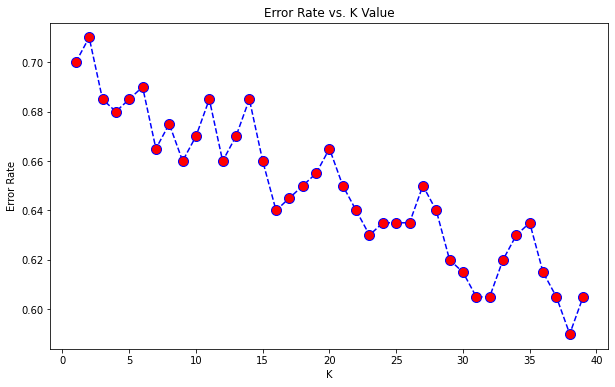

In [16]:
Ks = 40
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [17]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

In [18]:
acc

[0.3,
 0.29,
 0.315,
 0.32,
 0.315,
 0.31,
 0.335,
 0.325,
 0.34,
 0.33,
 0.315,
 0.34,
 0.33,
 0.315,
 0.34,
 0.36,
 0.355,
 0.35,
 0.345,
 0.335,
 0.35,
 0.36,
 0.37,
 0.365,
 0.365,
 0.365,
 0.35,
 0.36,
 0.38,
 0.385,
 0.395,
 0.395,
 0.38,
 0.37,
 0.365,
 0.385,
 0.395,
 0.41,
 0.395]

Maximum accuracy:- 0.41 at K = 37


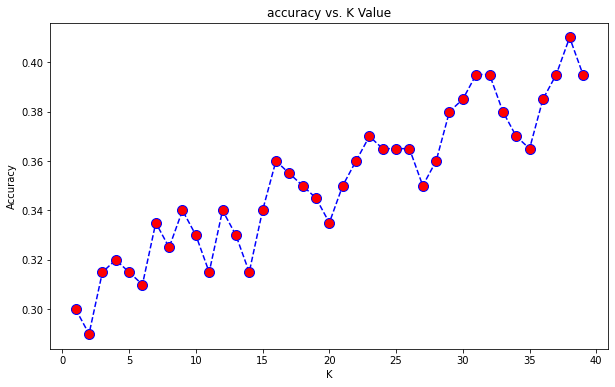

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))